<h1><center><b>Churn rate prediction</b></center></h1>

<h1><left>Members</left></h1>

1. 20280099 - Trần Minh Tiến (Leader)
2. 20280053 - Cao Huỳnh Anh Khoa
3. 20280105 - Đào Minh Trí
4. 20280010 - Phạm Bảo Cương

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
import warnings

warnings.filterwarnings('ignore')
plt.style.use("seaborn-whitegrid")

In [ ]:
PATH = "/content/drive/MyDrive/Data/churn_rate_prediction.csv" # Path to your file
# PATH = "churn_rate_prediction.csv"
data = pd.read_csv(PATH)
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


# Exploratory Data Analysis

In [ ]:
print(f"Dataset include {data.shape[0]} observations and {data.shape[1]} variables.")

Dataset include 36992 observations and 25 variables.


In [ ]:
categorical_cols = [feature for feature in data.columns if data[feature].dtype == "O"]
numerical_cols = [feature for feature in data.columns if data[feature].dtype != "O"]

print(f"Dataset with {len(categorical_cols)} features is categorical type, including:")
print(categorical_cols)
print(f"\nIn addition, the dataset also has {len(numerical_cols)} numericcal features including:")
print(numerical_cols)

Dataset with 19 features is categorical type, including:
['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

In addition, the dataset also has 6 numericcal features including:
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## customer_id

In [ ]:
print(f"Missing values: {data['customer_id'].isnull().sum()}")
print(f"Unique values: {data['customer_id'].nunique()}")

Missing values: 0
Unique values: 36992


- Cột `customer_id` đại diện cho số định danh __(id)__ của khách hàng. Mỗi khách hàng chỉ có thể có một số duy nhất.

- Cột `customer_id` không có missing values và có tất cả dữ liệu là duy nhất nên phù hợp với tính chất của cột này.

- Tuy nhiên, số định danh là dữ liệu không cần thiết cho một bài toán phân loại (classification) vì nó chỉ được dùng để phân biệt các khách hàng với nhau mà không liên quan đến những đặc tính khác. Nên ta có thể loại bỏ cột `customer_id`.

## Name

In [ ]:
print(f"Missing values: {data['Name'].isnull().sum()}")
print(f"Unique values: {data['Name'].nunique()}")

Missing values: 0
Unique values: 36992


- Cột `Name` không có missing values và có tất cả dữ liệu là độc nhất, điều này có thể chứng tỏ một phần là dữ liệu này không bị nhân bản (duplicate).

- Tên cũng là một loại dữ liệu không cần thiết khác cho một bài toán phân loại (classification). Tương tự như cột `customer_id`, nó chỉ để phân biệt các khách hàng với nhau.

- Nếu ta dùng cột `Name` để phân loại, thì chúng ta có thể sử dụng tên để đoán được giới tính của khách hàng. Tuy nhiên, chúng ta đã có cột `gender` nên cột `Name` là không cần thiết.

- Thay vào đó, ta có thể dùng cột `Name` để lọc được giới tính cho khách hàng nếu dữ liệu tại cột `gender` bị thiếu.

## age

In [ ]:
print(f"Missing values: {data['age'].isnull().sum()}")
print(f"Unique values: {data['age'].nunique()}")

Missing values: 0
Unique values: 55


In [ ]:
data['age'].unique()

array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
       33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
       58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
       46, 15, 64, 63])

__Cột `age` không có missing values và có tất cả 55 độ tuổi trong bộ dữ liệu này, điều này chứng tỏ bộ dữ liệu phân phối trên độ tuổi rất rộng.__

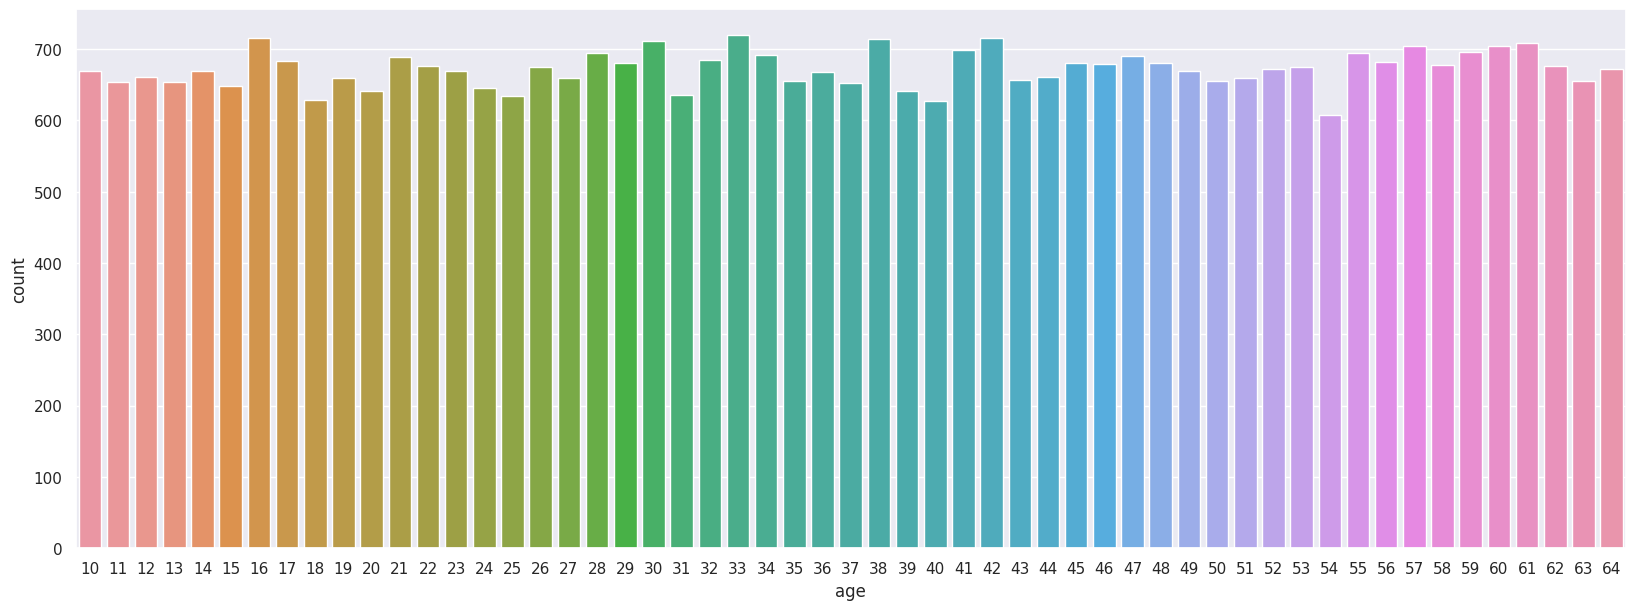

In [ ]:
sns.set(rc = {'figure.figsize':(20,7)})
sns.countplot(x = data['age'], data = data, orient = 'H');

- Tại đây, ta có thể được độ tuổi phân hóa là từ 10 - 64 tuổi, điều này chứng minh được dữ liệu được trích xuất từ một công ty trung bình đến lớn vì nó có thể tiếp cận cả khách hàng trẻ tuổi nhất là 10 tuổi và lớn tuổi nhất là 64 tuổi. Điều này làm dữ liệu thêm đa dạng hơn.

- Có thể thấy bộ dữ liệu chia theo tuổi khá đẹp vào đồng đều, mỗi độ tuổi đều có từ 600 - 700 mẫu dữ liệu.

## gender

In [ ]:
print(f"Missing values: {data['gender'].isnull().sum()}")
print(f"Unique values: {data['gender'].unique().tolist()}")
print()
print(data['gender'].value_counts())

Missing values: 0
Unique values: ['F', 'M', 'Unknown']

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64


- Cột `gender` tuy không có missing data nhưng lại có dữ liệu là __Unknown__, và số lượng dữ liệu này chỉ chiếm __59/36992__ tổng số lượng dữ liệu, điều này chứng minh được giá trị __Unknown__ được coi như là missing values và phải được xử lý.

- Để xử lý, chúng ta có cách như điền vào giá trị mode hoặc là sử dụng tên để tìm xem trên tập dữ liệu, khách hàng có giá trị của cột `gender` là __unknown__ có tên là nam hay nữ sau đó thực hiện thay đổi với giá trị tương ứng.

- ví dụ như khách hàng đó tên __Tom__ và cột `gender` có giá trị là __unknown__ thì sẽ xét trong dữ liệu xem những khách hàng khác có tên __Tom__ khác có giới tính gì , nếu M hoặc F nhiều hơn thì lấy.

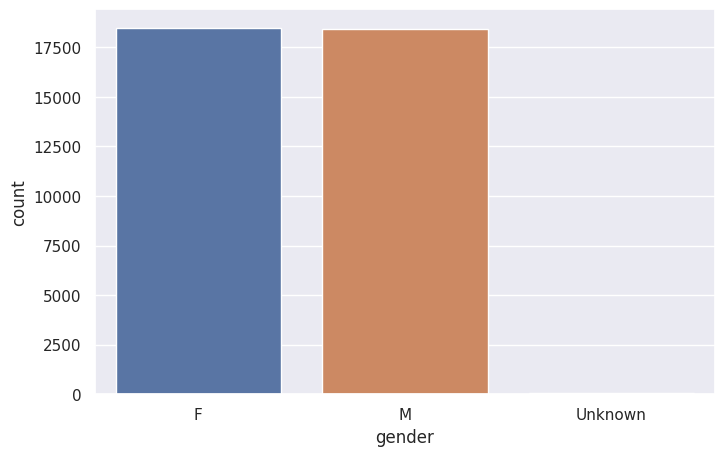

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['gender'], data = data, orient = 'H');

__Bộ dữ liệu chia theo giới tính khá đồng đều và đẹp, mỗi giới tính đều có số lượng hơn 17500 mẫu dữ liệu.__

## security_no

In [ ]:
print(f"Missing values: {data['security_no'].isnull().sum()}")
print(f"Unique values: {data['security_no'].nunique()}")

Missing values: 0
Unique values: 36992


- Cột `security` là cột không có missing values và có tất cả dữ liệu là độc nhất nên phù hợp với tính chất của cột này.

- Tuy nhiên, `security_no` là dữ liệu không cần thiết cho một bài toán phân loại (classification) vì nó chỉ được dùng để phân biệt các khách hàng với nhau mà không liên quan đến những đặc tính khác tương tự như cột `customer_id` và `name`.

## region_category

__Cột `region_category` đại diện cho khu vực mà khách hàng đăng ký.__

In [ ]:
print(f"Missing values: {data['region_category'].isnull().sum()}")
print(f"Unique values: {data['region_category'].unique().tolist()}\n")
print(data['region_category'].value_counts())

Missing values: 5428
Unique values: ['Village', 'City', 'Town', nan]

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64


__Cột `region_category` có 5428 missing values, số lượng missing value chiếm tỉ lệ 5428/36992 tổng số lượng dữ liệu, tỉ lệ này khá lớn nên chúng ta không bỏ đi những trường dữ liệu này. Thay vào đó chúng ta sẽ sử dụng một trong những phương pháp phổ biến để điền vào chỗ missing values là mode của cột đó.__

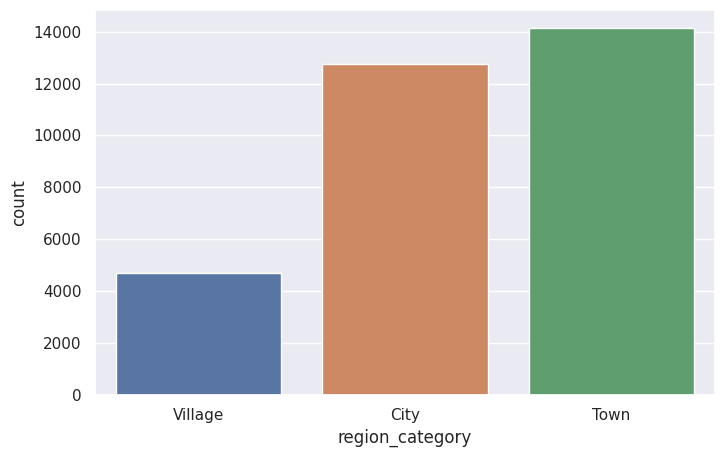

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['region_category'], data = data, orient = 'H');

__Số lượng khách hàng ở các thị trấn là cao nhất (hơn 14000 mẫu dữ liệu), tiếp theo đó là ở các thành phố (hơn 12000 mẫu dữ liệu), và có rất ít khách hàng ở nông thôn (chỉ khoảng 4700 mẫu dữ liệu).__

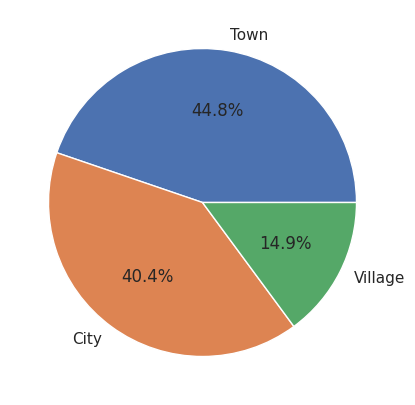

In [ ]:
data['region_category'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

__Cụ thể hơn :__
- __44.8%__ khách hàng đăng ký từ các thị trấn.
- __40.4%__ khách hàng đăng ký tại thành phố.
- __14.9%__ khách hàng đăng ký tại các vùng nông thôn.

__Như vậy, ta có thể thấy đa phần những người sử dụng trang web là những người sống ở các thành phố hoặc các thị trấn, những người này sẽ có nhu cầu sử dụng trang web cao hơn so với những người sống ở các vùng nông thôn.__

## membership_category

__Cột `membership_category` thể hiện xếp hạng thành viên mà khách hàng đó đạt được.__

In [ ]:
print(f"Missing values: {data['membership_category'].isnull().sum()}")
print(f"Unique values: {data['membership_category'].unique().tolist()}\n")
print(data['membership_category'].value_counts())

Missing values: 0
Unique values: ['Platinum Membership', 'Premium Membership', 'No Membership', 'Gold Membership', 'Silver Membership', 'Basic Membership']

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64


__Cột `membership_category` không có missing values và có tất cả 5 xếp hạng thành viên (cũng là 5 unique values).__

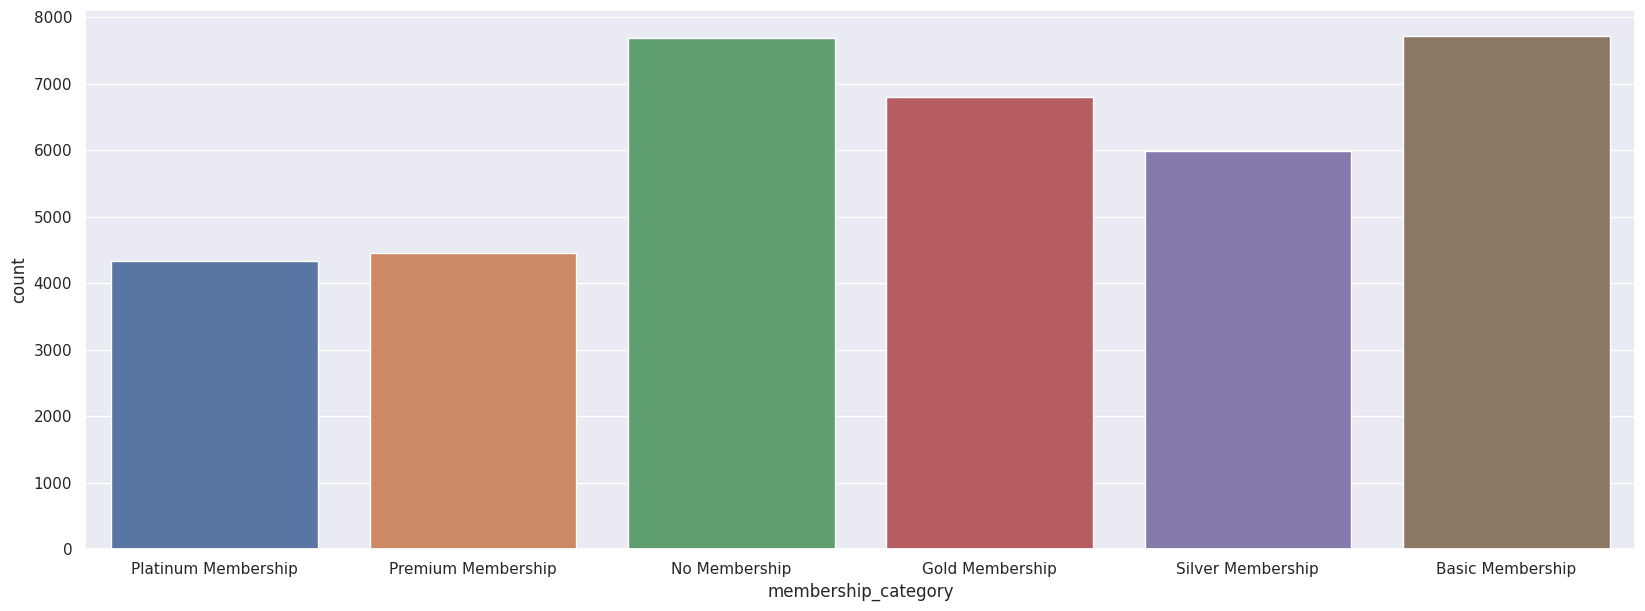

In [ ]:
sns.set(rc = {'figure.figsize':(20, 7)})
sns.countplot(x = data['membership_category'], data = data, orient = 'H');

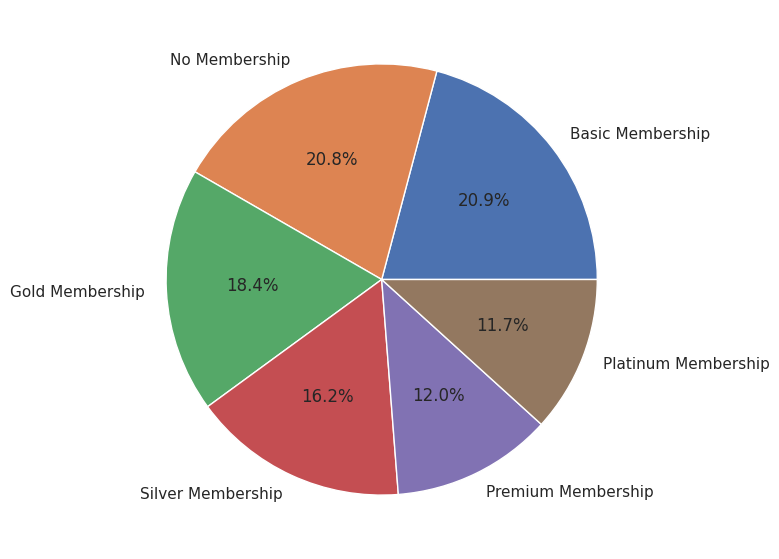

In [ ]:
data['membership_category'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

__Phân bố tập dữ liệu dựa trên cột `membership_category`__
- **Basic Membership** có số mẫu nhiều nhất  là __7724__ mẫu, chiếm __20.9%__.

- **Platinum Membership** là hạng có số mẫu ít nhất với lần lượt __4338__ mẫu, chiếm tỉ lệ thấp nhất __11,7%__.

- Bên cạnh đó, các xếp hạng khách hàng còn lại có phân bố:
    - **No Membership** nhiều thứ hai với __7692__ mẫu, chiếm __20.8%__.
    
    - **Gold Membership** có __6795__ mẫu, chiếm __18,4%__.
    
    - **Silver Membership** có __5988__ mẫu, chiếm __16.2%__.
    
    - **Premium Membership** có __4455__ mẫu, chiếm __12%__.


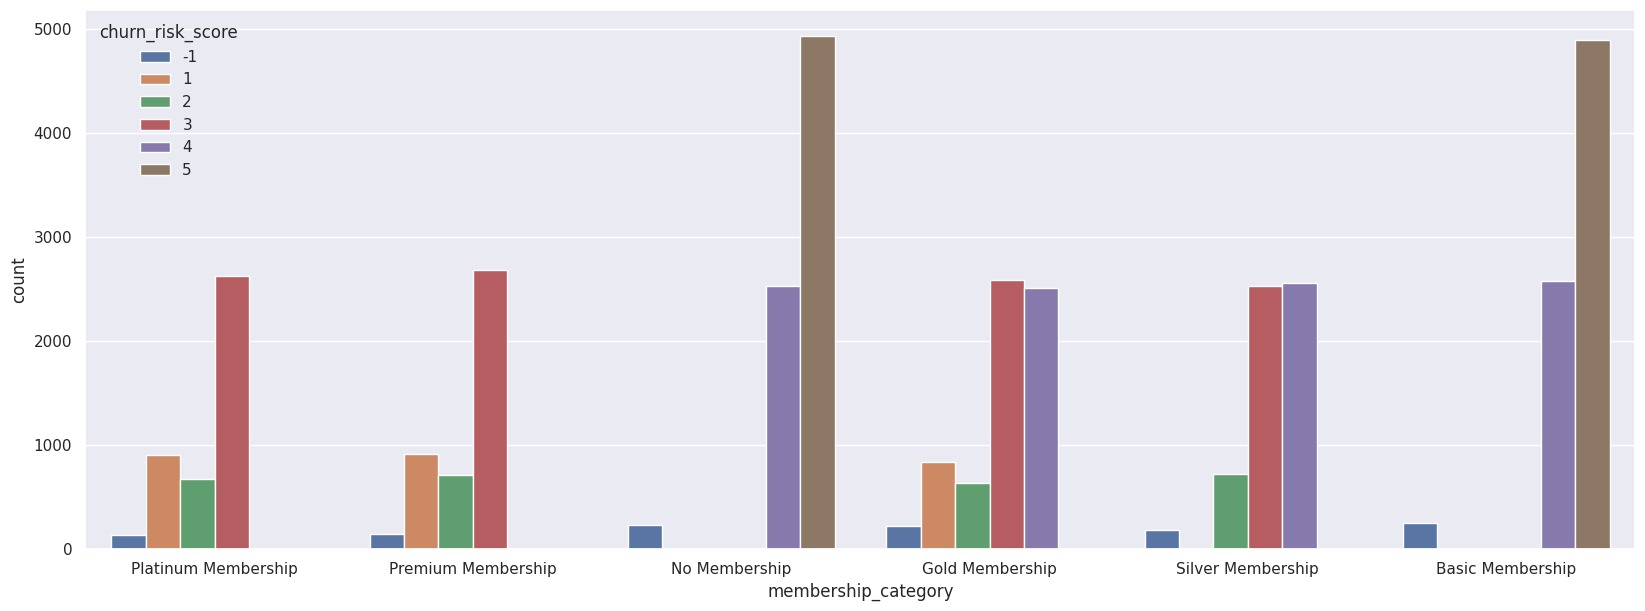

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['membership_category'], hue = data['churn_risk_score'])
plt.show()

- Điểm rủi ro mức 4 và 5 xuất hiện nhiều ở các hạng **No Membership** và **Basic Membership** và số lượng khá đồng đều.
- Các hạng cao hơn như **Silver Membership** và **Gold membership** thì điểm rủi ro lớn nhất là mức 4 và gần như không xuất hiện điểm rủi ro mức độ 5.
- Ở hạng **Platinum Membership** và **Premium Membership** điểm rủi ro chỉ đạt mức 3 là cao nhất.

__Đa phần các khách hàng đều có hạng là _Basic Membership_, và có rất ít khách hàng đạt được _Platinum Membership_, điều này cho thấy những khách hàng có hạng là _Platinum Membership_ dành nhiều thơi gian hơn để sử dụng trang web và các tiện ích khác, nên có thể những người này sẽ có tỉ lệ rời đi (churn rate) thấp hơn so với các nhóm khách hàng đạt các mức xếp hạng thấp hơn__

__Những khách hàng có mức xếp hạng thấp hơn sẽ có có tỉ lệ rời đi (churn rate) cao hơn vì có lẽ như là nhu cầu sử dụng web của họ không cao, và tần suất sử dụng web của họ thấp, thi thoảng mới sử dụng.__

## joining_date


__Cột `joining_date` đại diện cho thời gian mà khách hàng tham gia sử dụng__

In [ ]:
print(f"Missing values: {data['joining_date'].isnull().sum()}")
print(f"Unique values: {data['joining_date'].nunique()}")

Missing values: 0
Unique values: 1096


- Cột `joining_date` là cột không có missing values và bộ dữ liệu này được thu thập trải dài trong 1096 ngày.
- Thời gian tham gia sử dụng không phải là dữ liệu không cần thiết cho bài toán phân loại (classification).

## joined_through_referral



__Cột `joined_through_referral` thể hiện rằng khách hàng có tham gia qua bất kỳ mã hoặc id giới thiệu nào không__

In [ ]:
print(f"Missing values: {data['joined_through_referral'].isnull().sum()}")
print(f"Unique values: {data['joined_through_referral'].unique().tolist()}\n")
print(data['joined_through_referral'].value_counts())

Missing values: 0
Unique values: ['No', '?', 'Yes']

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64


__Cột `joined_through_referral` này tuy không có missing data nhưng lại có dữ liệu là '?', mà đối với một cột thể hiện rằng khách hàng có tham gia qua bất kỳ mã hoặc id giới thiệu nào không thì câu trả lời chỉ là Yes hoặc No, điều này chứng minh được dữ liệu '?' này cũng coi như là missing data và phải được xử lý.__

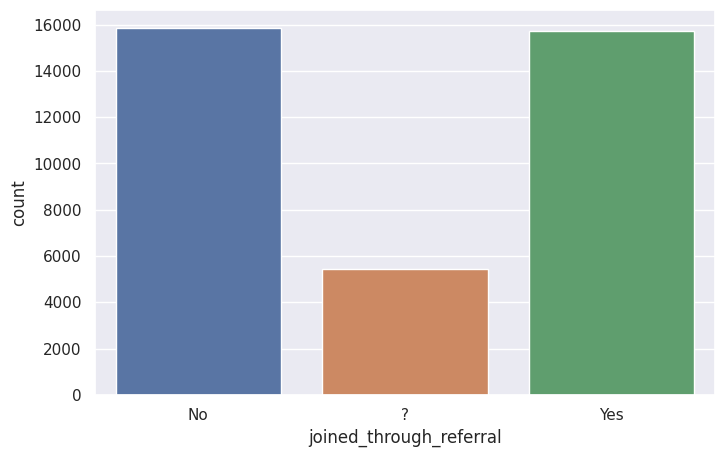

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['joined_through_referral'], data = data, orient = 'H');

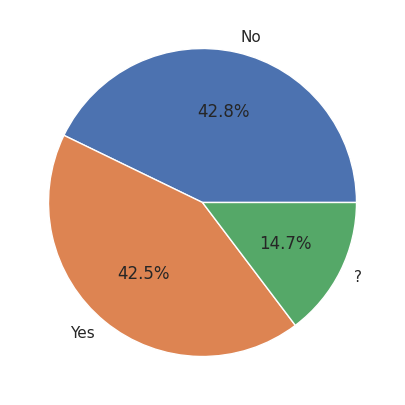

In [ ]:
data['joined_through_referral'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

__Phân bố của tập dữ liệu theo cột `join_through_referral`, với tỉ lệ phân bố của 'Yes' và 'No' gần như là bằng nhau (xấp xỉ 16000 mẫu).__
- **Yes** chiếm __42.5%__
- **No** chiếm __42.8%__
- Dữ liệu bị khuyết (ký tự '?') chiếm __14.7%__

## referral_id

__Cột `referral_id` đại diện cho id hoặc mã giới thiệu (nếu khách hàng tham gia thông qua mã giới thiệu) đã sử dụng.__

In [ ]:
print(f"Missing values: {data['referral_id'].isnull().sum()}")
print(f"Unique values: {data['referral_id'].nunique()}\n")
print(data['referral_id'].value_counts())

Missing values: 0
Unique values: 11359

xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: referral_id, Length: 11359, dtype: int64


- Cột `referral_id` là cột không có missing values và có tất cả 11359 mã giới thiệu khách hàng được sử dụng.
- Mã giới thiệu là dữ liệu không cần thiết cho một bài toán phân loại (classification), nên ta có thể loại bỏ khỏi dữ liệu dùng để train mô hình.

## preferred_offer_types

__Cột `preferred_offer_types` thể hiện loại ưu đãi mà khách hàng ưa thích.__

In [ ]:
print(f"Missing values: {data['preferred_offer_types'].isnull().sum()}")
print(f"Unique values: {data['preferred_offer_types'].unique().tolist()}\n")
print(data['preferred_offer_types'].value_counts())

Missing values: 288
Unique values: ['Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers', nan]

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64


__Cột `preferred_offer_types` có 288 missing values. Chúng ta sẽ có một số cách phổ biến như điền vào chỗ missing values thành những giá trị xuất hiện nhiều nhất (mode) của cột dữ liệu đó.__

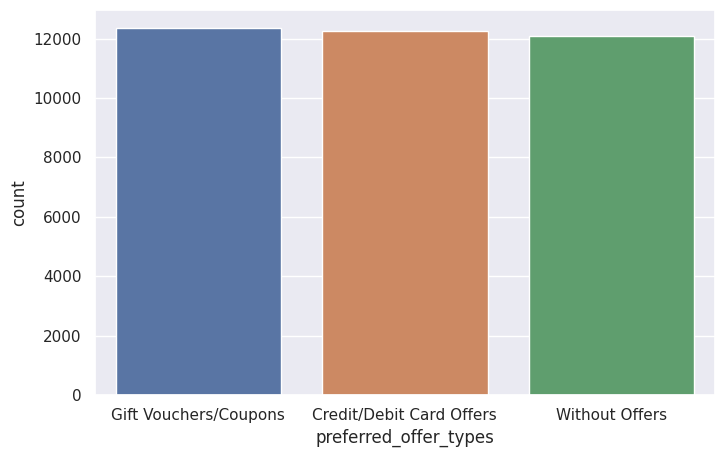

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['preferred_offer_types'], data = data, orient = 'H');

__phân bố của tập dữ liệu theo cột `preferred_offer_types`, với tỉ lệ phân bố của _Gift Vouchers/Coupons_, _Credit/Debit Card Offers_, _Without Offers_ xấp xỉ nhau (đều hơn 12000).__

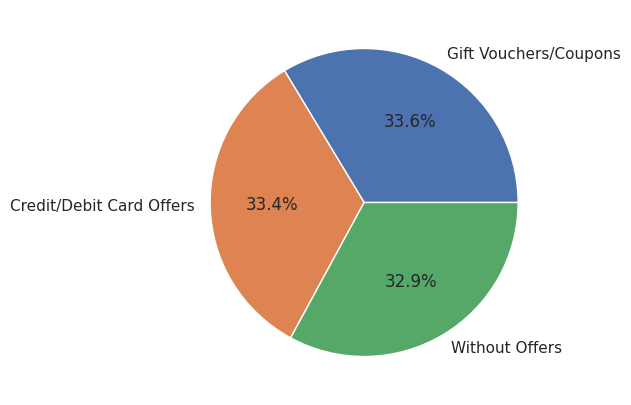

In [ ]:
data['preferred_offer_types'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Gift Vouchers/Coupons** chiếm __33.6%__
- **Credit/Debit Card Offers** chiếm __33.4%__  
- **Without Offers** chiếm __32.9%__

## medium_of_operation

__Cột `medium_of_operation` đại diện cho thiết bị mà khách hàng dùng để giao dịch.|__

In [ ]:
print(f"Missing values: {data['medium_of_operation'].isnull().sum()}")
print(f"Unique values: {data['medium_of_operation'].unique().tolist()}\n")
print(data['medium_of_operation'].value_counts())

Missing values: 0
Unique values: ['?', 'Desktop', 'Smartphone', 'Both']

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64


- Cột `medium_of_operation` này tuy không có missing data
- Nhưng lại có những trường dữ liệu là __?__, đối với cột đại diện cho thiết bị khách hàng sử dụng thì dữ liệu tương ứng sẽ là các thiết bị như là: __'Desktop'__, __'Smartphone'__. Điều này chứng minh được dữ liệu __?__ này cũng coi như là một dạng missing values cần được xử lý.

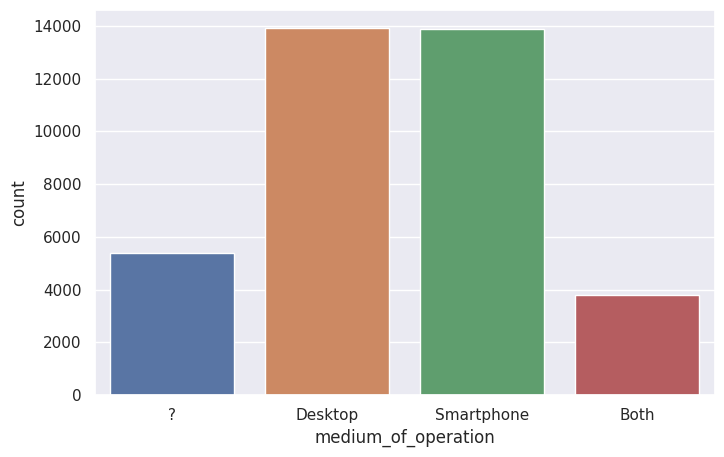

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['medium_of_operation'], data = data, orient = 'H');

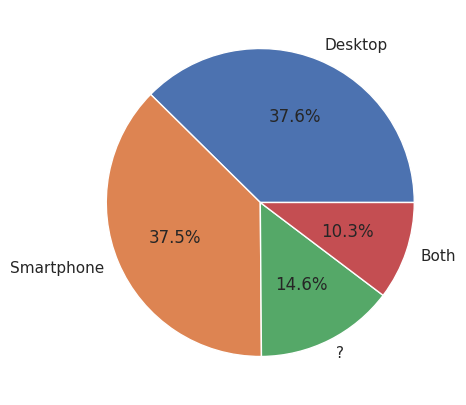

In [ ]:
data['medium_of_operation'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

__Phân bố của cột `medium_of_operation`__
- Với số lượng khách hàng sử dụng **Desktop**, **Smartphone** gần như là bằng nhau (xấp xỉ 14000 ) chiếm lần lượt là __37.6%__ và __37.5%__.
- Số lượng dùng cùng lúc cả 2 thiết bị __(Both)__ là khá ít (dưới 4000) chiếm __10.3%__.
- Còn lại khoảng __5400__ là dữ liệu bị khuyết, chiếm __14.6%__ khá cao và cần được xử lý.

## internet_option

__Cột `internet_option` thể hiện loại dịch vụ internet mà khách hàng đang sử dụng__

In [ ]:
print(f"Missing values: {data['internet_option'].isnull().sum()}")
print(f"Unique values: {data['internet_option'].unique().tolist()}\n")
print(data['internet_option'].value_counts())

Missing values: 0
Unique values: ['Wi-Fi', 'Mobile_Data', 'Fiber_Optic']

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64


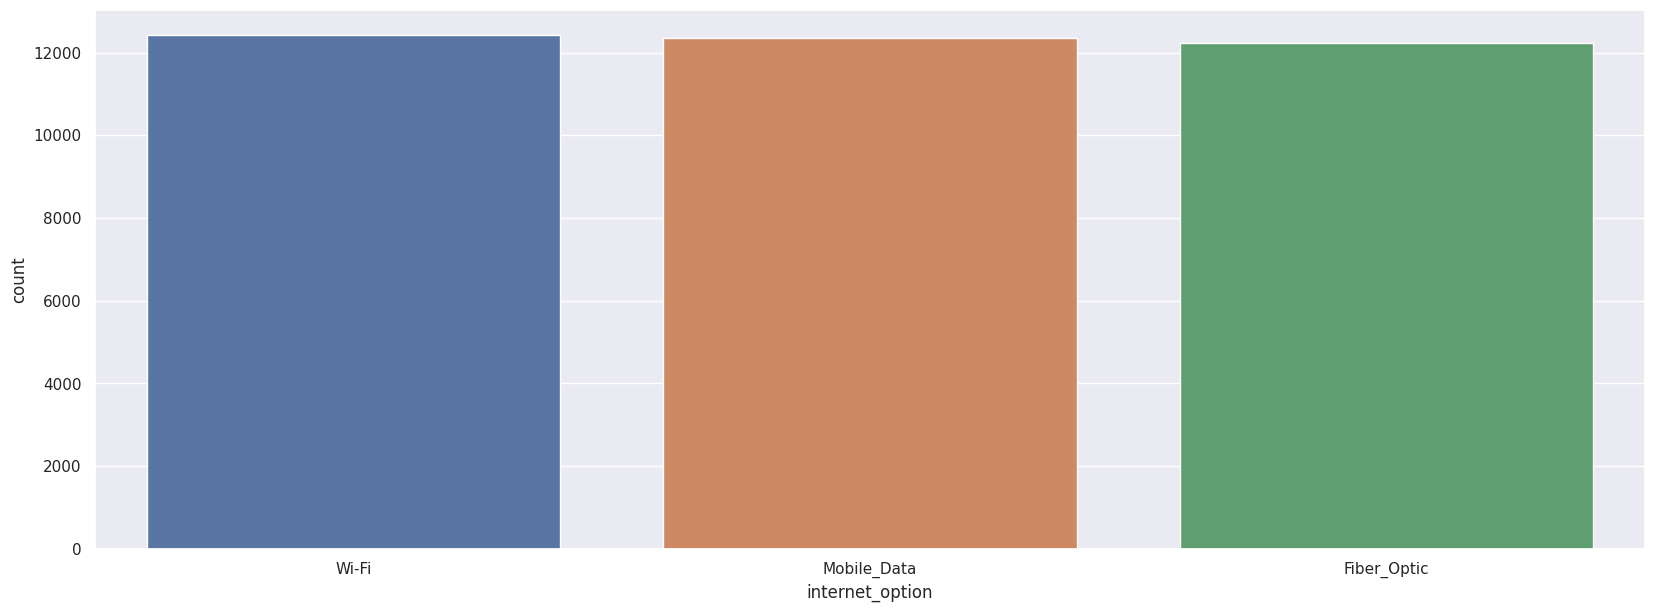

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['internet_option'], data = data, orient = 'H');

__Phân bố của tập dữ liệu theo cột `internet_option`, với số lượng phân bố của _Wi-Fi_, _Mobile_Data_, _Fiber_Optic_ gần như đều nhau (đều hơn 12000).__

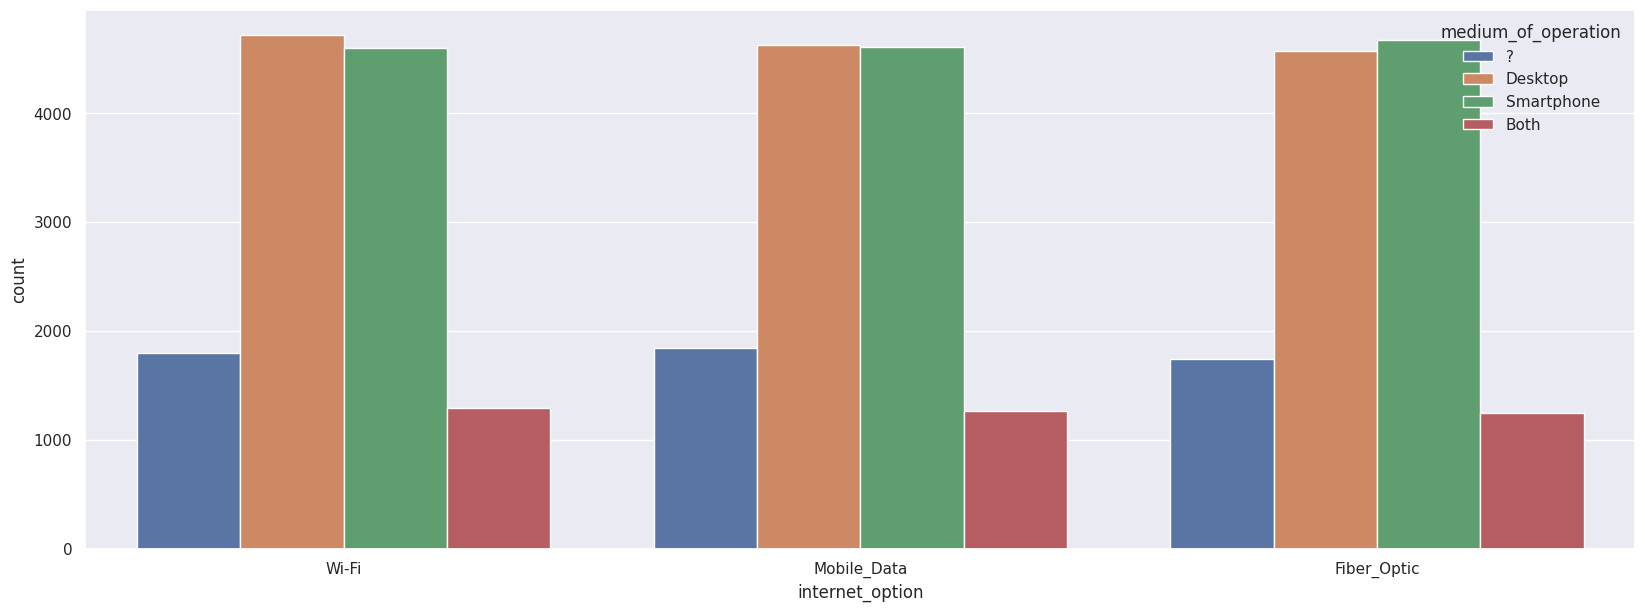

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data["internet_option"], hue = data["medium_of_operation"]);


**Với mỗi giá trị trong cột `internet_option`, chúng ta kiểm tra trong cột `medium_of_operation` xem giá trị nào là nhiều nhất ứng với mỗi giá trị của cột `internet_option`.**

**Đối với những khách hàng có `medium_of_operation` = __?__, chúng tôi sẽ thay thế __?__ bằng loại tùy chọn internet chủ yếu được sử dụng trong bước tiền xử lý.**

* Đa số mọi người có `internet_option` = __'Wi-Fi'__ có `medium_of_operation` = __'Desktop'__, vì vậy thay thế __?__ bằng __ Desktop __ trong Bảng.

* Đa số mọi người có `internet_option` = __'Fiber_Optic'__ có `medium_of_operation` = __'Smartphone'__, vì vậy thay thế __?__ bằng __ Smartphone __ trong Bảng.

* Đa số mọi người có `internet_option` = __'Mobile_Data'__ có `medium_of_operation` = __'Smartphone'__, vì vậy thay thế __?__ bằng __ Smartphone __ trong Bảng.

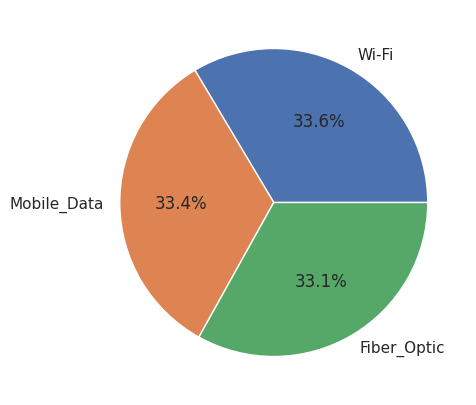

In [ ]:
data['internet_option'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Wi-Fi** chiếm __33.6%__
- **Mobile_Data** chiếm __33.4%__
- **Fiber_Optic** chiếm __33.1%__

## last_visit_time

__Cột `last_visit_time` thể hiện thời gian lần cuối khách hàng truy cập vào dịch vụ__

In [ ]:
print(f"Missing values: {data['last_visit_time'].isnull().sum()}")
print(f"Unique values: {data['last_visit_time'].nunique()}")

Missing values: 0
Unique values: 30101


- Ta có thể thấy được cột `last_visit_time` là cột không có missing values và có tất cả __30101__ unique values.
- Thời gian truy cập là dữ liệu không cần thiết cho một bài toán phân loại (classification) vì nó chỉ là thời gian lần cuối truy cập của khách hàng, không mang thêm bất cứ thông tin gì.

## days_since_last_login

__Cột `days_since_last_login` thế hiện ra số ngày kể từ lần cuối cùng mà khách hàng truy cập vào dịch vụ__

In [ ]:
print(f"Missing values: {data['days_since_last_login'].isnull().sum()}")
print(f"Unique values: { sorted(data['days_since_last_login'].unique().tolist())}")

Missing values: 0
Unique values: [-999, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


__Tại đây, ta có thể thấy được cột `days_since_last_login` này tuy không có missing data nhưng lại có dữ liệu là '-999*', mà đối với số ngày kể từ ngày phải là số dương, điều này chứng minh được những trường dữ liệu có giá trị '-999' này coi như là missing data và phải được xử lý.__

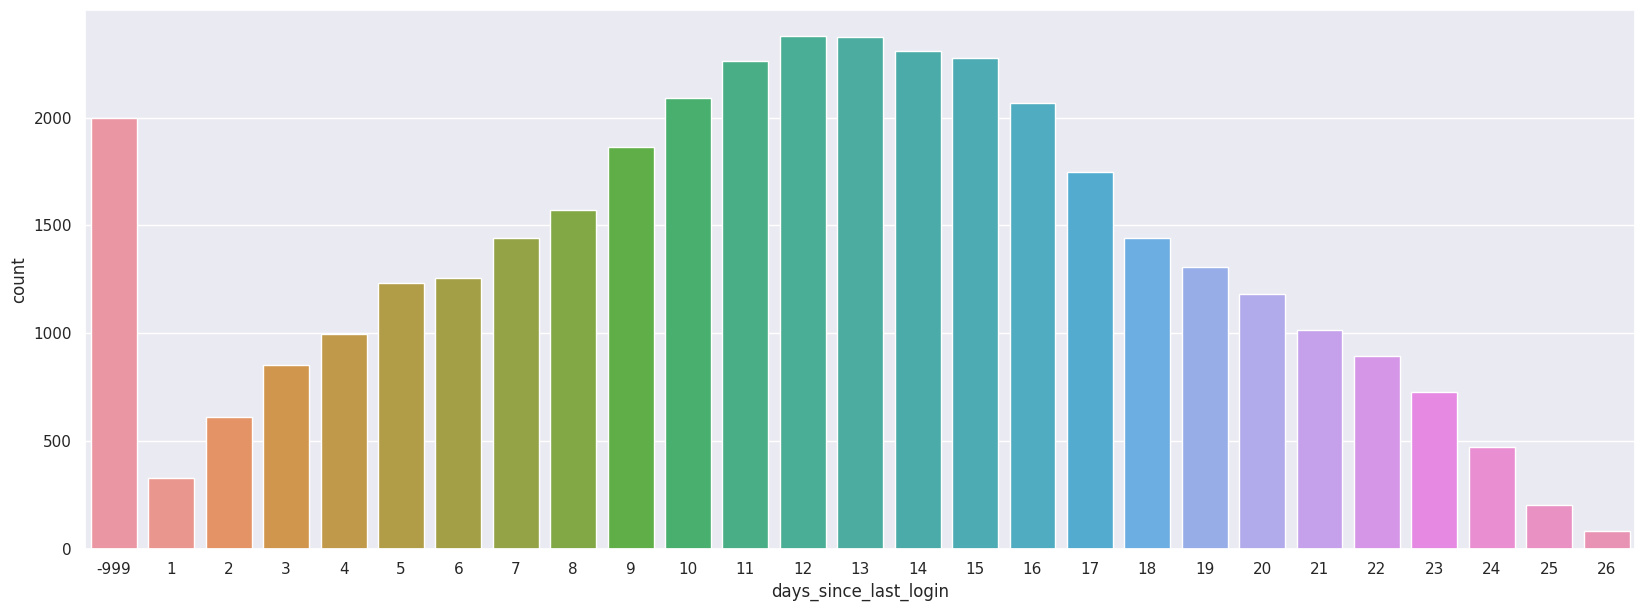

In [ ]:
sns.set(rc = {'figure.figsize':(20, 7)})
sns.countplot(x = data['days_since_last_login'], data = data, orient = 'H');

In [ ]:
data.loc[data['days_since_last_login'] < 0].shape[0]

1999

__Phân bố của tập dữ liệu theo cột `days_since_last_login`. Trong đó một lượng lớn khách hành có thời gian không truy cập là từ 9 đến 17 ngày. Missing values cũng chiếm một số lượng lớn (gần 2000)__

## avg_time_spent

__Cột `avg_time_spent` thể hiện thời gian trung bình mà khách hàng sử dụng dịch vụ.__

In [ ]:
print(f"Missing values: {data['avg_time_spent'].isnull().sum()}")
print(f"Unique values: {data['avg_time_spent'].nunique()}")

Missing values: 0
Unique values: 25961


__`avg_time_spent` là cột không có missing values và có tất cả 25961 giá trị.__

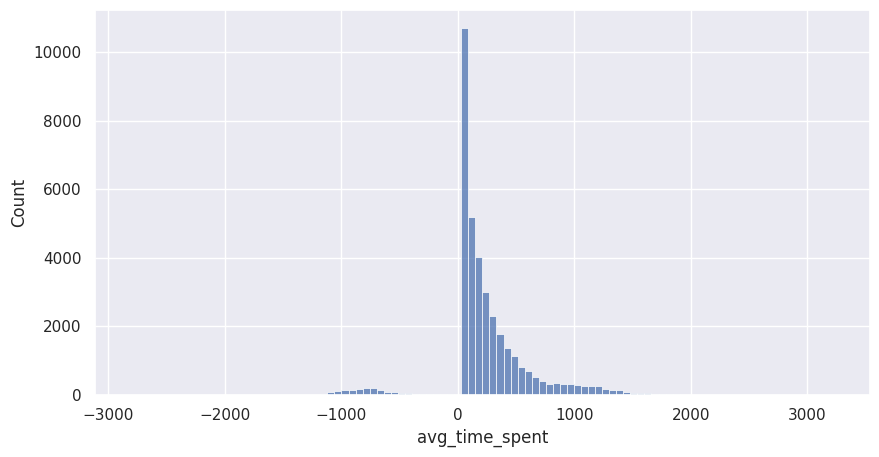

In [ ]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.histplot(x = data['avg_time_spent'], data = data, bins = 100);

__`avg_time_spent` có những giá trị âm. Điều này là không hợp lý vì dữ liệu tại cột này thể hiện thời gian trung bình mà khách hàng sử dụng dịch vụ nên dữ liệu không thể âm. Từ đó, ta có thể xem những dữ liệu âm này là missing value.__

In [ ]:
len(data['avg_time_spent'][data['avg_time_spent'] < 0])

1719

__`avg_time_spent` có 1719 missing values__

## avg_transaction_value

__Cột `avg_transaction_value` thể hiện giá trị giao dịch trung bình của khách hàng__

In [ ]:
print(f"Missing values: {data['avg_transaction_value'].isnull().sum()}")
print(f"Unique values: {data['avg_transaction_value'].nunique()}")

Missing values: 0
Unique values: 36894


__Ta có thể thấy được cột `avg_transaction_value` là cột không có missing values và có tất cả 36894 unique values.__

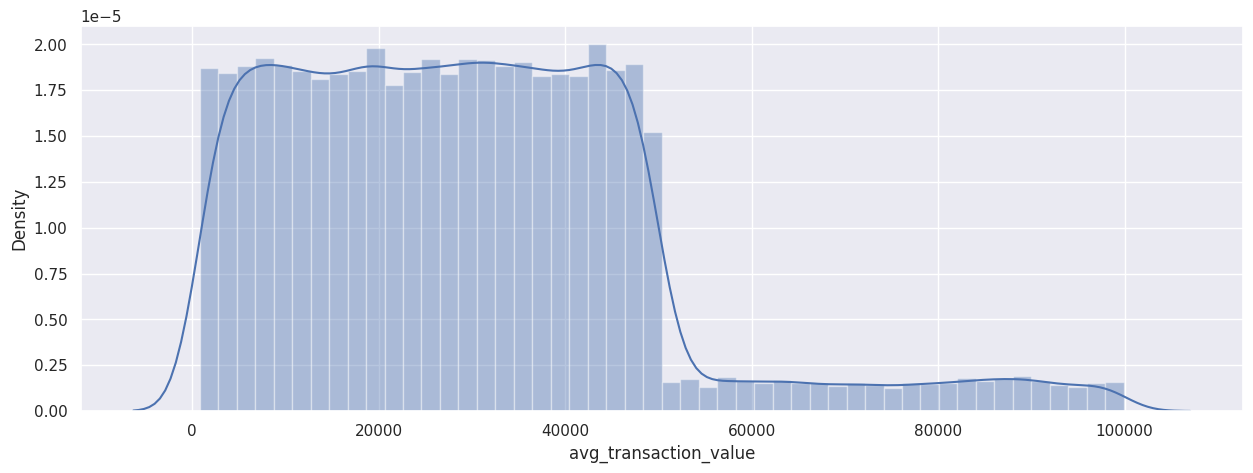

In [ ]:
plt.figure(figsize = (15, 5))
sns.distplot(data['avg_transaction_value'], bins = 50);

__Phần lớn giá trị giao dịch nằm trong khoảng từ 1000 -> 50000.__

## avg_frequency_login_days

__Cột `avg_frequency_login_days` thể hiện tần suất đăng nhập trung bình của khách hàng.__

In [ ]:
print(f"Missing values: {data['avg_frequency_login_days'].isnull().sum()}")
print(f"Unique values: {data['avg_frequency_login_days'].nunique()}")

Missing values: 0
Unique values: 1654


__`avg_frequency_login_days` là cột không có missing values và có tất cả 1654 unique values__

In [ ]:
data['avg_frequency_login_days'].unique()

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

__`avg_frequency_login_days` có những giá trị âm. Điều này là không hợp lý vì dữ liệu tại cột này thể hiện tần suất đăng nhập trung bình của khách hàng nên dữ liệu tại đây không thể âm. Từ đó, ta có thể xem những dữ liệu âm này là missing value__

In [ ]:
len(data['avg_frequency_login_days'][data['avg_frequency_login_days'] == 'Error'])

3522

__Ngoài những giá trị âm ra, trong cột `avg_frequency_login_days` còn có 3522 giá trị **Error**. Nguyên nhân là có thể do lỗi xảy ra trong quá trình tính toán dữ liệu, nên ta có thể xem rằng giá trị **Error** là giá trị missing values__

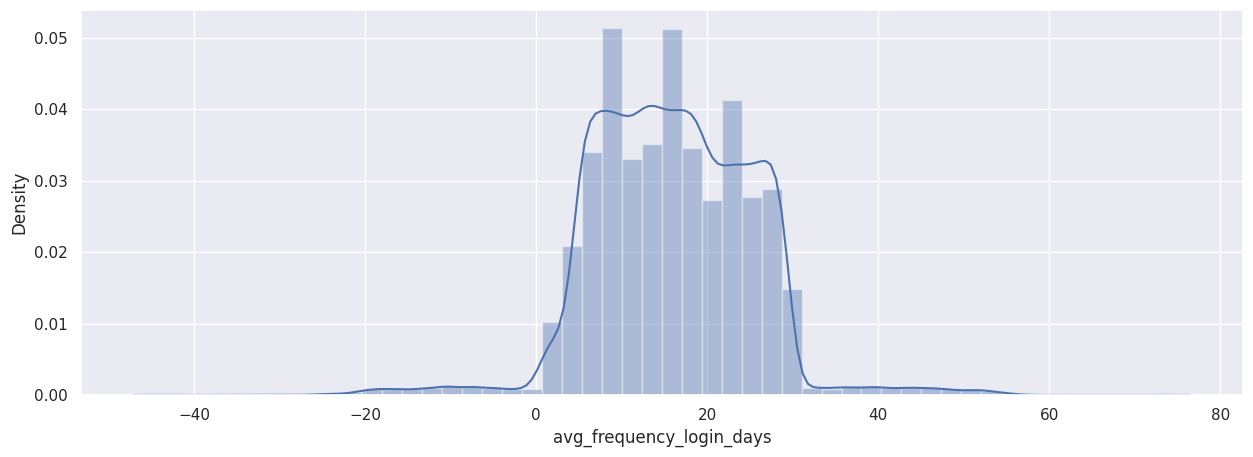

In [ ]:
plt.figure(figsize = (15, 5))
sns.distplot(a = data['avg_frequency_login_days'][data['avg_frequency_login_days'] != 'Error'], bins = 50);

__Sau khi tạm thời loại bỏ đi các giá trị **Error** thì ta được đồ thị như trên. Ta có thể thấy được tần suất đăng nhập nhiều nhất là từ 10 -> 25__


## points_in_wallet

__Cột `points_in_wallet` thể hiện điểm số của khách hàng trên mỗi giao dịch__

In [ ]:
print(f"Missing values: {data['points_in_wallet'].isnull().sum()}")
print(f"Unique values: {data['points_in_wallet'].nunique()}")

Missing values: 3443
Unique values: 23699


__`points_in_wallet` có 3443 missing values, và tổng cộng có 23699 unique values.__

In [ ]:
len(data['points_in_wallet'][data['points_in_wallet'] < 0])

136

__Sau khi kiểm tra, ta thấy được ngoài các missing values, cột `points_in_wallet` còn chứa thêm các giá trị âm. Điều này là không hợp lý vì dữ liệu tại cột này thể hiện điểm số của khách hàng trên mỗi giao dịch nên dữ liệu tại đây không thể âm. Từ đó, ta có thể xem những dữ liệu âm này là missing value.__

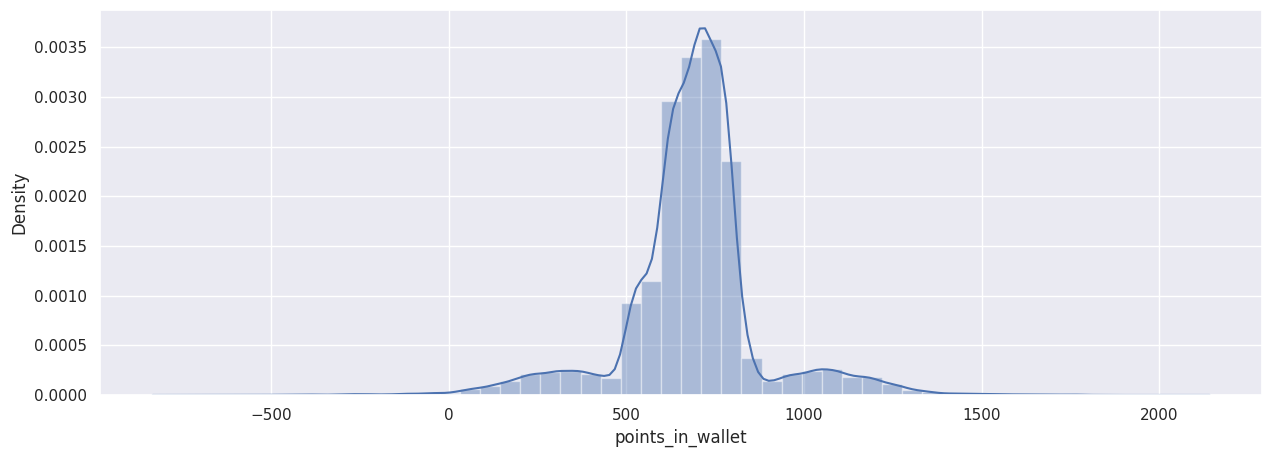

In [ ]:
plt.figure(figsize = (15, 5))
sns.distplot(a = data['points_in_wallet'], bins = 50);

__Ta có thể thấy được phần lớn điểm nằm trong khoảng từ 500 -> 800__

## used_special_discount

__Cột `used_special_discount` thể hiện xem khách hàng có sử dụng những giảm giá đặc biệt không__

In [ ]:
print(f"Missing values: {data['used_special_discount'].isnull().sum()}")
print(f"Unique values: {data['used_special_discount'].unique().tolist()}\n")
print(data['used_special_discount'].value_counts())

Missing values: 0
Unique values: ['Yes', 'No']

Yes    20342
No     16650
Name: used_special_discount, dtype: int64


__Ta thấy được rằng cột `used_special_discount` không có missing values và có 2 dữ liệu là 'Yes' và 'No'__

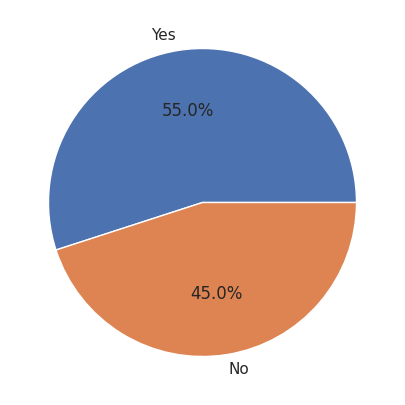

In [ ]:
data['used_special_discount'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Yes** chiếm __55%__
- **No** chiếm __45%__

## offer_application_preference

__Cột `offer_application_preference` thể hiện xem khách hàng có thích các ưu đãi hay không__

In [ ]:
print(f"Missing values: {data['offer_application_preference'].isnull().sum()}")
print(f"Unique values: {data['offer_application_preference'].unique().tolist()}\n")
print(data['offer_application_preference'].value_counts())

Missing values: 0
Unique values: ['Yes', 'No']

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64


__Ta thấy được rằng cột `used_special_discount` không có missing values và có 2 dữ liệu là 'Yes' và 'No'__

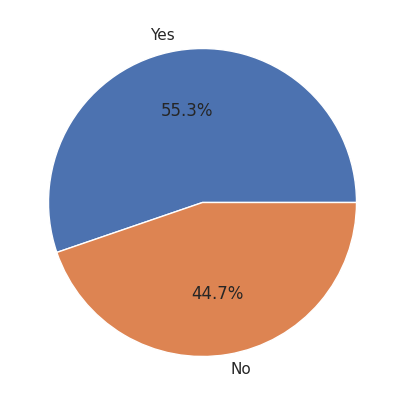

In [ ]:
data['offer_application_preference'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Yes** chiếm __55.3%__
- **No** chiếm __44.7%__

## past_complaint

__Cột `past_complaint` thể hiện xem khách hàng có đưa ra bất kỳ phàn nàn nào trong quá khứ hay không__

In [ ]:
print(f"Missing values: {data['past_complaint'].isnull().sum()}")
print(f"Unique values: {data['past_complaint'].unique().tolist()}\n")
print(data['past_complaint'].value_counts())

Missing values: 0
Unique values: ['No', 'Yes']

No     18602
Yes    18390
Name: past_complaint, dtype: int64


__Ta thấy được rằng cột `past_complaint` không có missing values và có 2 dữ liệu là 'Yes' và 'No'__

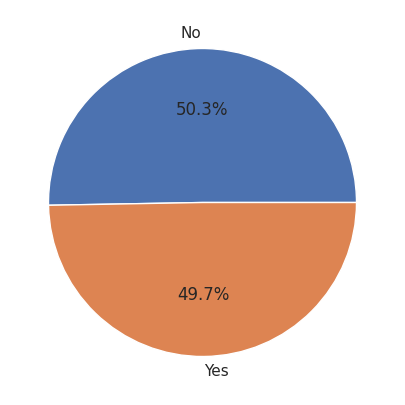

In [ ]:
data['past_complaint'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Yes** chiếm __50.3%__
- **No** chiếm __49.7%__

## complaint_status

__`complaint_status` thể hiện xem các khiếu nại của khách hàng đã được giải quyết hay chưa__

In [ ]:
print(f"Missing values: {data['complaint_status'].isnull().sum()}")
print(f"Unique values: {data['complaint_status'].unique().tolist()}\n")
print(data['complaint_status'].value_counts())

Missing values: 0
Unique values: ['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved', 'No Information Available']

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


__Ta thấy được rằng cột `complaint_status` không có missing values và có 5 dữ liệu là 'Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved' và 'No Information Available'.__

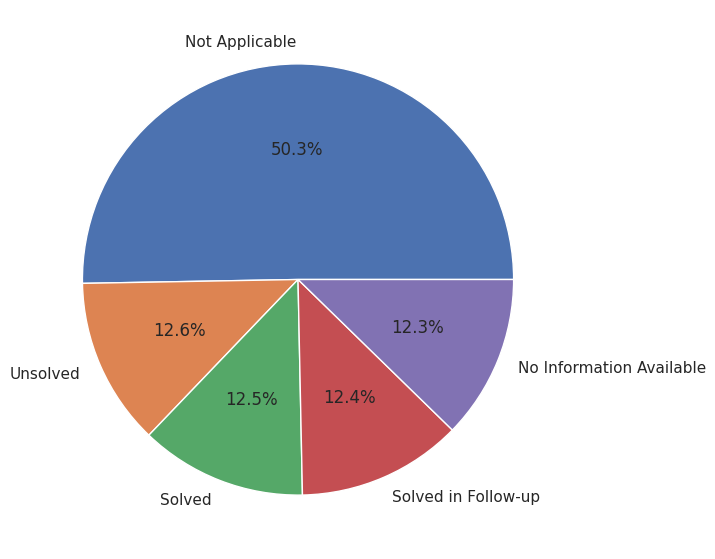

In [ ]:
plt.figure(figsize = (7, 7))
data['complaint_status'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

**Not Applicable** chiếm __50.3%__

**Solved** chiếm __12.5%__

**Solved in Follow-up** chiếm __12.4%__

**Unsolved** chiếm __12.6%__

**No Information Available** chiếm __12.3%__

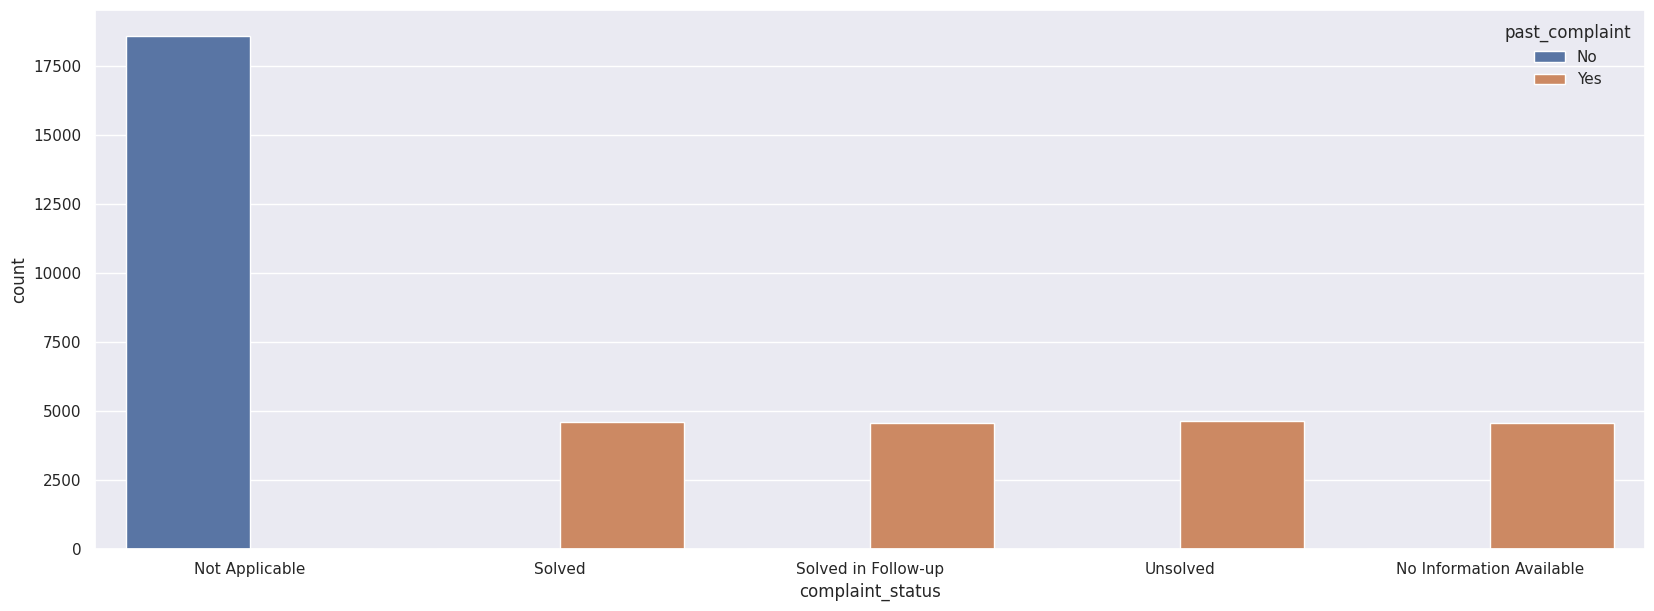

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['complaint_status'], hue = data["past_complaint"]);

__Ta có thể thấy được sự tương ứng đối với cột `past_complaint`. Nếu tại cột `past_complaint` mang giá trị là 'No' thì giá trị tại cột `complaint_status` tương ứng là 'Not Applicable'. Ngược lại nếu là 'Yes' thì giá trị tương ứng tại cột này là một trong những giá trị sau  'Solved', 'Solved in Follow-up', 'Unsolved' và 'No Information Available'__

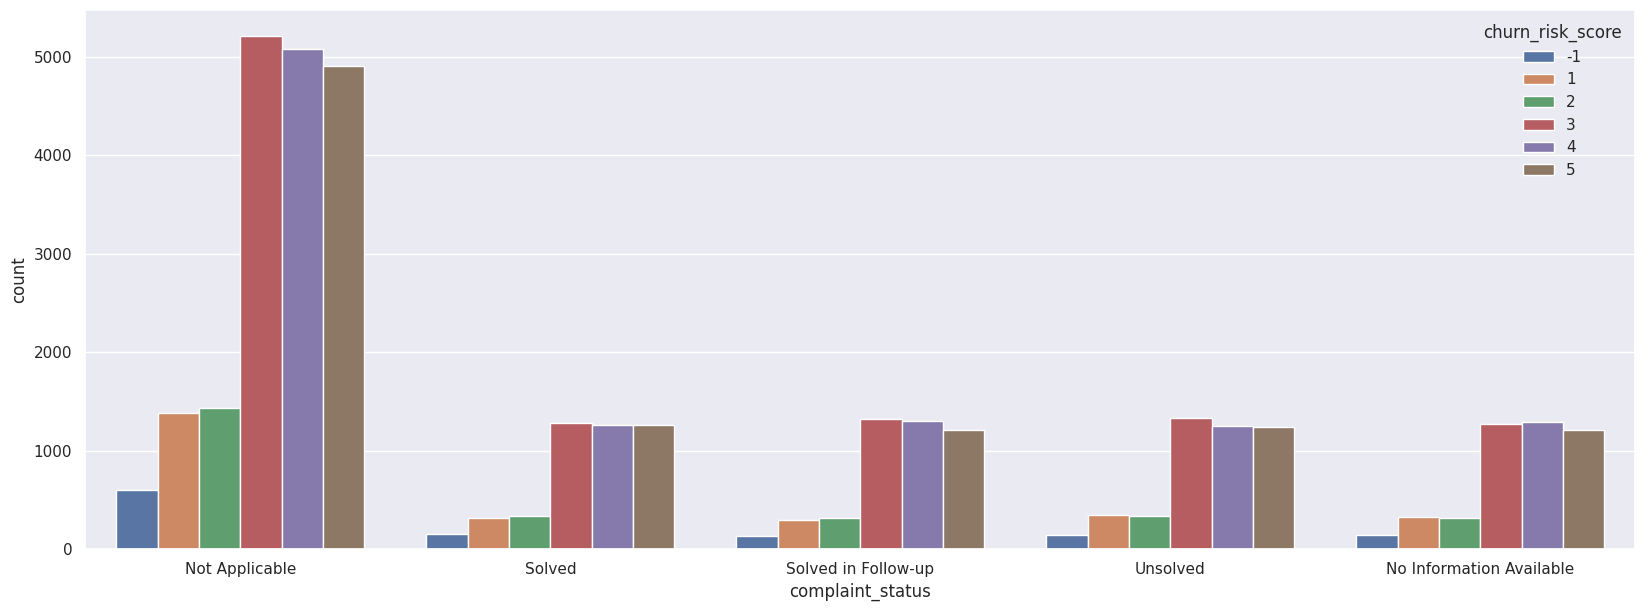

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['complaint_status'], hue = data["churn_risk_score"]);

__Tại đây, ta có thể thấy được điểm rủi ro từ 3 - > 5 ở trạng thái **Not Applicable** cao hơn nhiều so với các trạng thái khác__

## feedback

__Cột `feedback` thể hiện phản hồi của khách hàng cung cấp__

In [ ]:
print(f"Missing values: {data['feedback'].isnull().sum()}")
print(f"Unique values: {data['feedback'].unique().tolist()}\n")
print(data['feedback'].value_counts())

Missing values: 0
Unique values: ['Products always in Stock', 'Quality Customer Care', 'Poor Website', 'No reason specified', 'Poor Product Quality', 'Poor Customer Service', 'Too many ads', 'User Friendly Website', 'Reasonable Price']

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


__`feedback` không có missing values và có 9 dữ liệu là:__
- **Products always in Stock**
- **Quality Customer Care**
- **Poor Website**
- **No reason specified**
- **Poor Product Quality**
- **Poor Customer Service**
- **Too many ads**
- **User Friendly Website***
- **Reasonable Price**

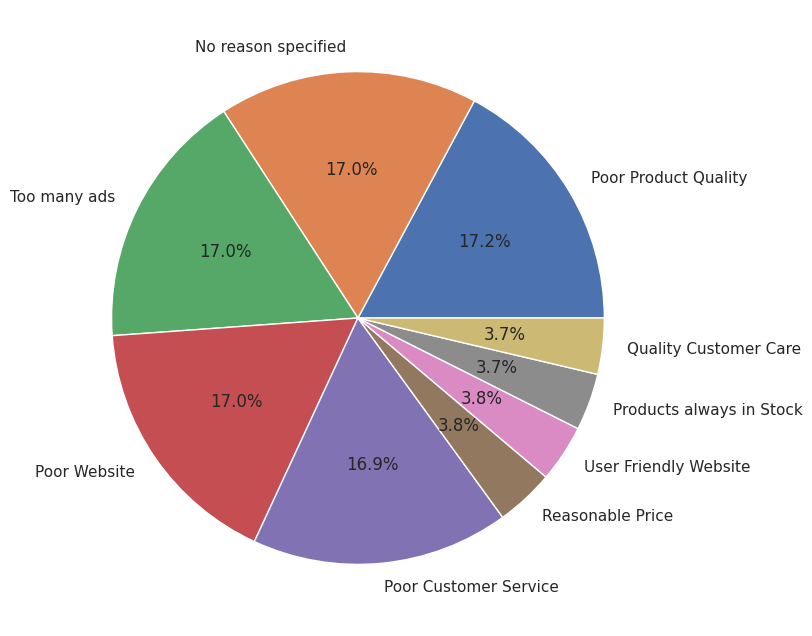

In [ ]:
plt.figure(figsize = (8, 8))
data['feedback'].value_counts().plot.pie(autopct = '%1.1f%%', ylabel = "");

- **Products always in Stock** chiếm __3.7%__
- **Quality Customer Care** chiếm __3.7%__
- **Poor Website** chiếm __17%__
- **No reason specified** chiếm __17%%__
- **Poor Product Quality** chiếm __17.2%__
- **Poor Customer Service** chiếm _17%_
- **Too many ads** chiếm __17%__
- **User Friendly Website** chiếm __3.8%__
- **Reasonable Price** chiếm __3.8%__

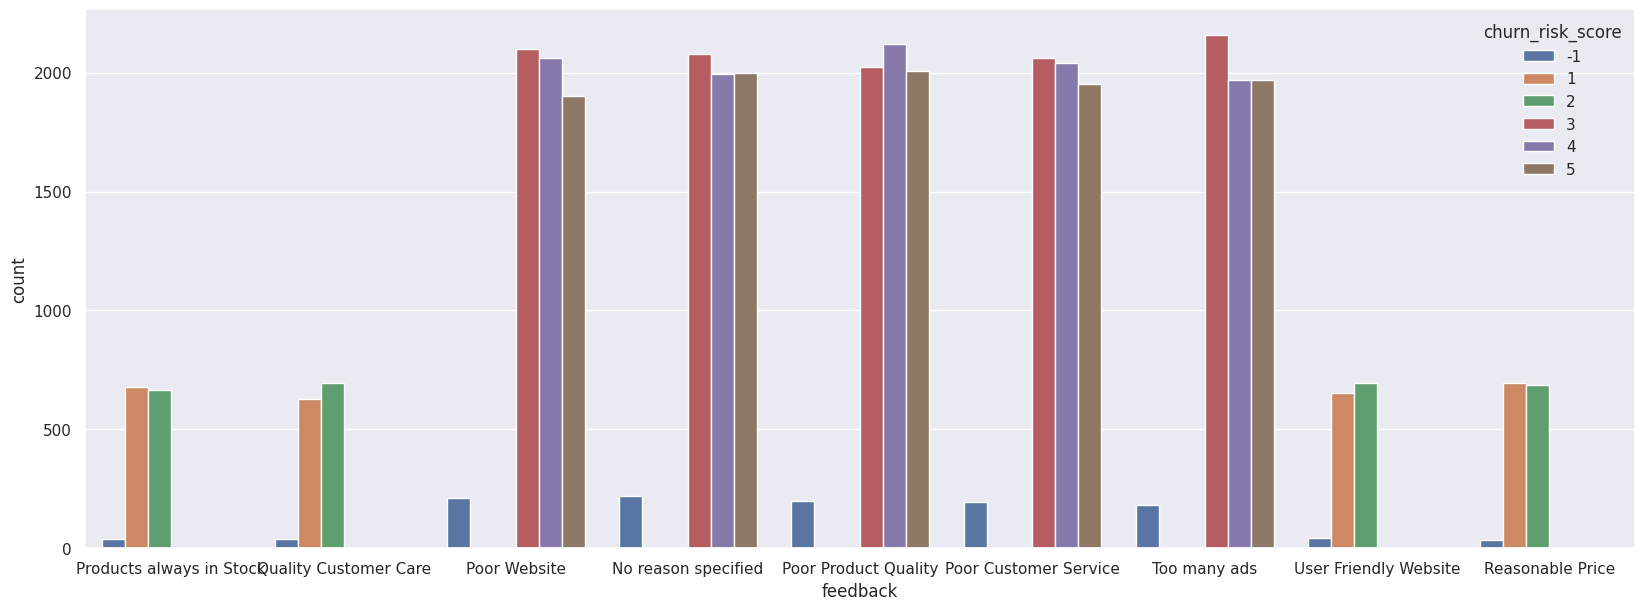

In [ ]:
plt.figure(figsize = (20, 7))
sns.countplot(x = data['feedback'], hue = data['churn_risk_score']);

__Ta có thể thấy nếu cộng tỉ lệ các feedback có điểm rủi ro dưới 3 thì ta chỉ được 15.1%, cộng các feedback có điểm rủi ro trên 3 ta được 84.9%. Điều đó có thể chứng mình rằng chỉ có 15% khách hàng đánh giá tích cực còn gần 85 % là đánh giá tiêu cực.__

## churn_risk_score

__Cột `churn_risk_score` thể hiện rủi ro rời bỏ của khách hàng__

In [ ]:
display(data['churn_risk_score'].unique().tolist())
display(data['churn_risk_score'].value_counts())

[2, 1, 5, 3, 4, -1]

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

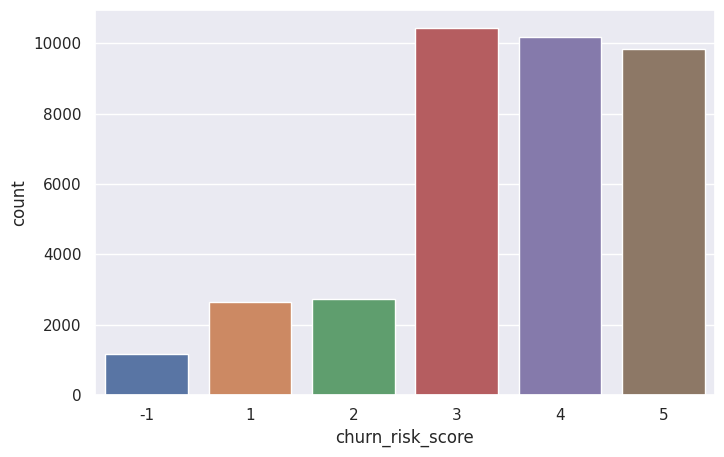

In [ ]:
sns.set(rc = {'figure.figsize':(8, 5)})
sns.countplot(x = data['churn_risk_score'], data = data);

__Sau khi tìm kiếm trên internet, nhận thấy ràng giá trị churn rate âm là có nghĩa.__

* Nó đạt được khi tổng doanh thu bổ sung được tạo ra từ các khách hàng hiện tại lớn hơn doanh thu bị mất do sự rời đi của khách hàng. Khi doanh thu định kỳ tăng lên mà không cần thêm khách hàng mới, đạt được tỷ lệ duy trì doanh thu dương.

* Nói đơn giản, tỷ lệ rời âm là khi lượng khách hàng hiện tại đang chi thêm nhiều tiền (dịch vụ, nâng cấp và tiện ích bổ sung) đến mức số tiền mất đi do khách hàng rời bỏ được bù đắp bằng số tiền đó, thì khi này churn rate sẽ mang giá trị âm.

__Nhưng ở đây ta chỉ xét giá trị churn rate từ 1-5, nên các giá trị -1 sẽ bị loại bỏ khỏi tập dữ.__

## Box plot

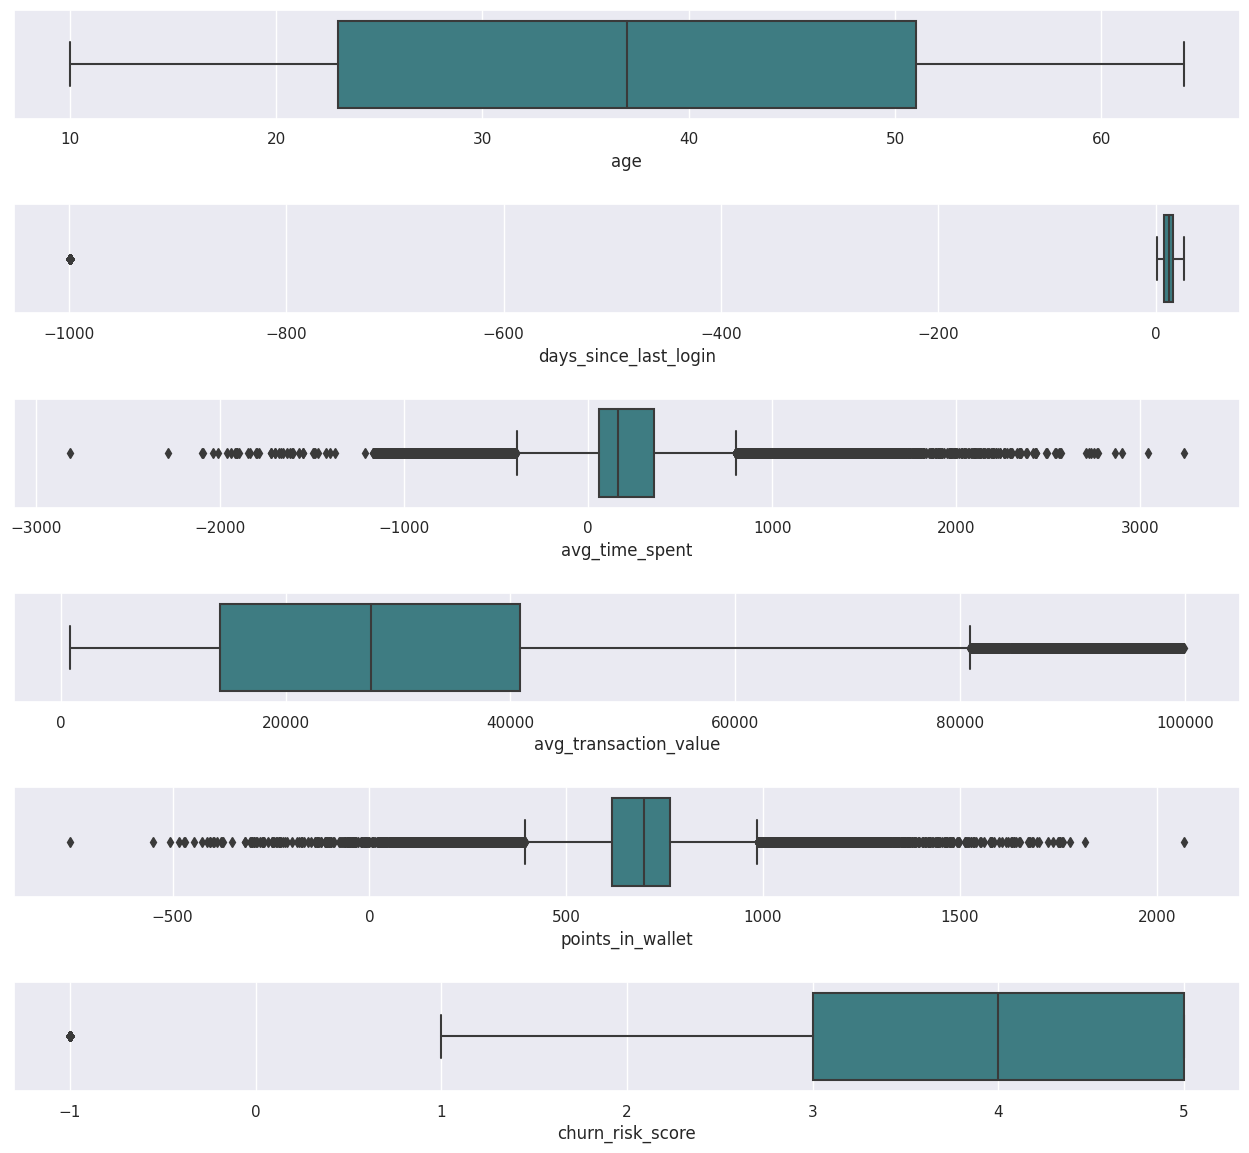

In [ ]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(13, 2*len(numerical_cols)),sharex=False,sharey=False)
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=data,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

__Tập dữ liệu có nhiều outlier vì có những cột có giá trị bất thường ví dụ như là cột `avg_time_spent` có chứa giá trị âm, những giá trị này không nằm trong khoảng phân vị  của cột dữ liệu nên bị xem là các oulier, và cần được xử lý.__

# Data Preprocessing

In [ ]:
# Hàm thực hiện fill mising value những vẫn giữ nguyên được phân phối của cột dữ liệu
def fill_missing_with_distribution(df, column):
    value_counts = df[column].value_counts(normalize=True)
    missing_indices = df[column].isnull()
    missing_count = missing_indices.sum()

    values = value_counts.index
    distribution = value_counts.values

    fill_values = np.random.choice(values, size=missing_count, p=distribution, replace=True)
    df.loc[missing_indices, column] = fill_values

In [ ]:
def preprocessing_data(data):
    df = data.copy()

    # Như đã nói ở trên, ta sẽ sử dụng tên để fill vào cái giá trị unknown của cột gender.
    # ví dụ như có một người tên Tom có gender là Male, nhưng một người khác cũng có tên Tom nhưng gender lại có giá trị Unknown
    # ta sẽ thực hiện fill giá trị gender tại vị trí Tom có gender unknown là Male vì những mẫu trên có người tên Tom và giá trị gender là Male.
    for x in df['Name'][df['gender'] == 'Unknown']:
      firstnames = [x.split(' ')[0]]
      fill_values = df['gender'][df['Name'].str.split().str[0].isin(firstnames)].value_counts().idxmax()
      df['gender'][df['Name']== x] = fill_values

    # Thay đổi các ký tự '?' thành loại tùy chọn internet được sử dụng nhiều nhất trong bước tiền xử lý.
    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Wi-Fi')
    df['medium_of_operation'] = np.where((condt), 'Smartphone', df['medium_of_operation'])

    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Fiber_Optic')
    df['medium_of_operation'] = np.where((condt), 'Desktop', df['medium_of_operation'])

    condt = (df['medium_of_operation'] == '?') & (df['internet_option'] == 'Mobile_Data')
    df['medium_of_operation'] = np.where((condt), 'Smartphone', df['medium_of_operation'])

    # Bỏ những cột không liên quan đến việc huấn luyện mô hình
    drop_cols = ['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time']
    df.drop(columns = drop_cols, axis = 1, inplace = True)

    # Thực hiện thay thế các giá trị bất thường thành NaN
    df["avg_frequency_login_days"] = df["avg_frequency_login_days"].replace("Error", np.NaN)
    df["days_since_last_login"] = df["days_since_last_login"].replace(-999, np.NaN)
    df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)
    df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] < 0, np.nan, df['avg_frequency_login_days'])
    df['joined_through_referral'] = df['joined_through_referral'].replace("?", np.NaN)

    # Xử lý các giá trị NaN của 2 cột 'joined_through_referral' và 'preferred_offer_types' mà vẫn giữ nguyên phân phối.
    fill_missing_with_distribution(data, 'joined_through_referral')
    fill_missing_with_distribution(data, 'preferred_offer_types')

    # Thực hiện biến đổi các giá trị âm thành các giá trị dương
    df["avg_time_spent"]= df["avg_time_spent"].abs()
    df["points_in_wallet"]= df["points_in_wallet"].abs()

    # Như đã nói ở phần EDA ta sẽ thực hiện loại bỏ các trường dữ liệu có 'churn_risk_score' = -1
    df = df[df['churn_risk_score'] != -1]

    # Xử lý các giá trị NaN
    # Nếu cột đó có kiểu dữ liệu là số thì thay NaN bằng median
    # Nếu cột đó có kiểu dữ liệu khác dữ liệu số thì thay NaN bằng mode
    for col in df.columns:
        if df[col].dtype != 'O' and df[col].isnull().sum() > 0:
            df[col].replace([np.nan], df[col].median(), inplace = True)
        elif df[col].dtype == 'O' and df[col].isnull().sum() > 0:
            df[col].replace([np.nan], df[col].mode()[0], inplace = True)

    return df

In [ ]:
df = preprocessing_data(data)
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16.0,306.34,12838.38,10.0,697.83,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  object 
 2   region_category               35829 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joined_through_referral       35829 non-null  object 
 5   preferred_offer_types         35829 non-null  object 
 6   medium_of_operation           35829 non-null  object 
 7   internet_option               35829 non-null  object 
 8   days_since_last_login         35829 non-null  float64
 9   avg_time_spent                35829 non-null  float64
 10  avg_transaction_value         35829 non-null  float64
 11  avg_frequency_login_days      35829 non-null  float64
 12  points_in_wallet              35829 non-null  float64
 13  u

In [ ]:
df.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

# Feature Engineering

In [ ]:
new_categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
new_numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
print(f"Categorical features:\n{new_categorical_cols}")
print(f"Numerical features:\n{new_numerical_cols}")

Categorical features:
['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
Numerical features:
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


In [ ]:
def apply_feature_engineering(data):
    df = data.copy()
    #Label encoding
    df["gender"] = df["gender"].astype("category").cat.codes
    df["joined_through_referral"] = df["joined_through_referral"].astype("category").cat.codes
    df["offer_application_preference"] = df["offer_application_preference"].astype("category").cat.codes
    df["used_special_discount"] = df["used_special_discount"].astype("category").cat.codes
    df["past_complaint"] = df["joined_through_referral"].astype("category").cat.codes
    #Onehot encoding
    df = pd.get_dummies(df, columns = ['region_category','membership_category','preferred_offer_types',
                                       'medium_of_operation','internet_option','complaint_status','feedback'])
    return df


In [ ]:
df = apply_feature_engineering(df)
df.shape

(35829, 44)

In [ ]:
df.head()

,age,gender,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18,0,0,17.0,300.63,53005.25,17.0,781.75,1,1,...,0,0,0,0,0,1,0,0,0,0
1,32,0,0,16.0,306.34,12838.38,10.0,697.83,1,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,1,14.0,516.16,21027.00,22.0,500.69,0,1,...,0,0,0,0,1,0,0,0,0,0
3,37,1,1,11.0,53.27,25239.56,6.0,567.66,0,1,...,1,0,0,0,1,0,0,0,0,0
4,31,0,0,20.0,113.13,24483.66,16.0,663.06,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             35829 non-null  int64  
 1   gender                                          35829 non-null  int8   
 2   joined_through_referral                         35829 non-null  int8   
 3   days_since_last_login                           35829 non-null  float64
 4   avg_time_spent                                  35829 non-null  float64
 5   avg_transaction_value                           35829 non-null  float64
 6   avg_frequency_login_days                        35829 non-null  float64
 7   points_in_wallet                                35829 non-null  float64
 8   used_special_discount                           35829 non-null  int8   
 9   offer_application_preference           

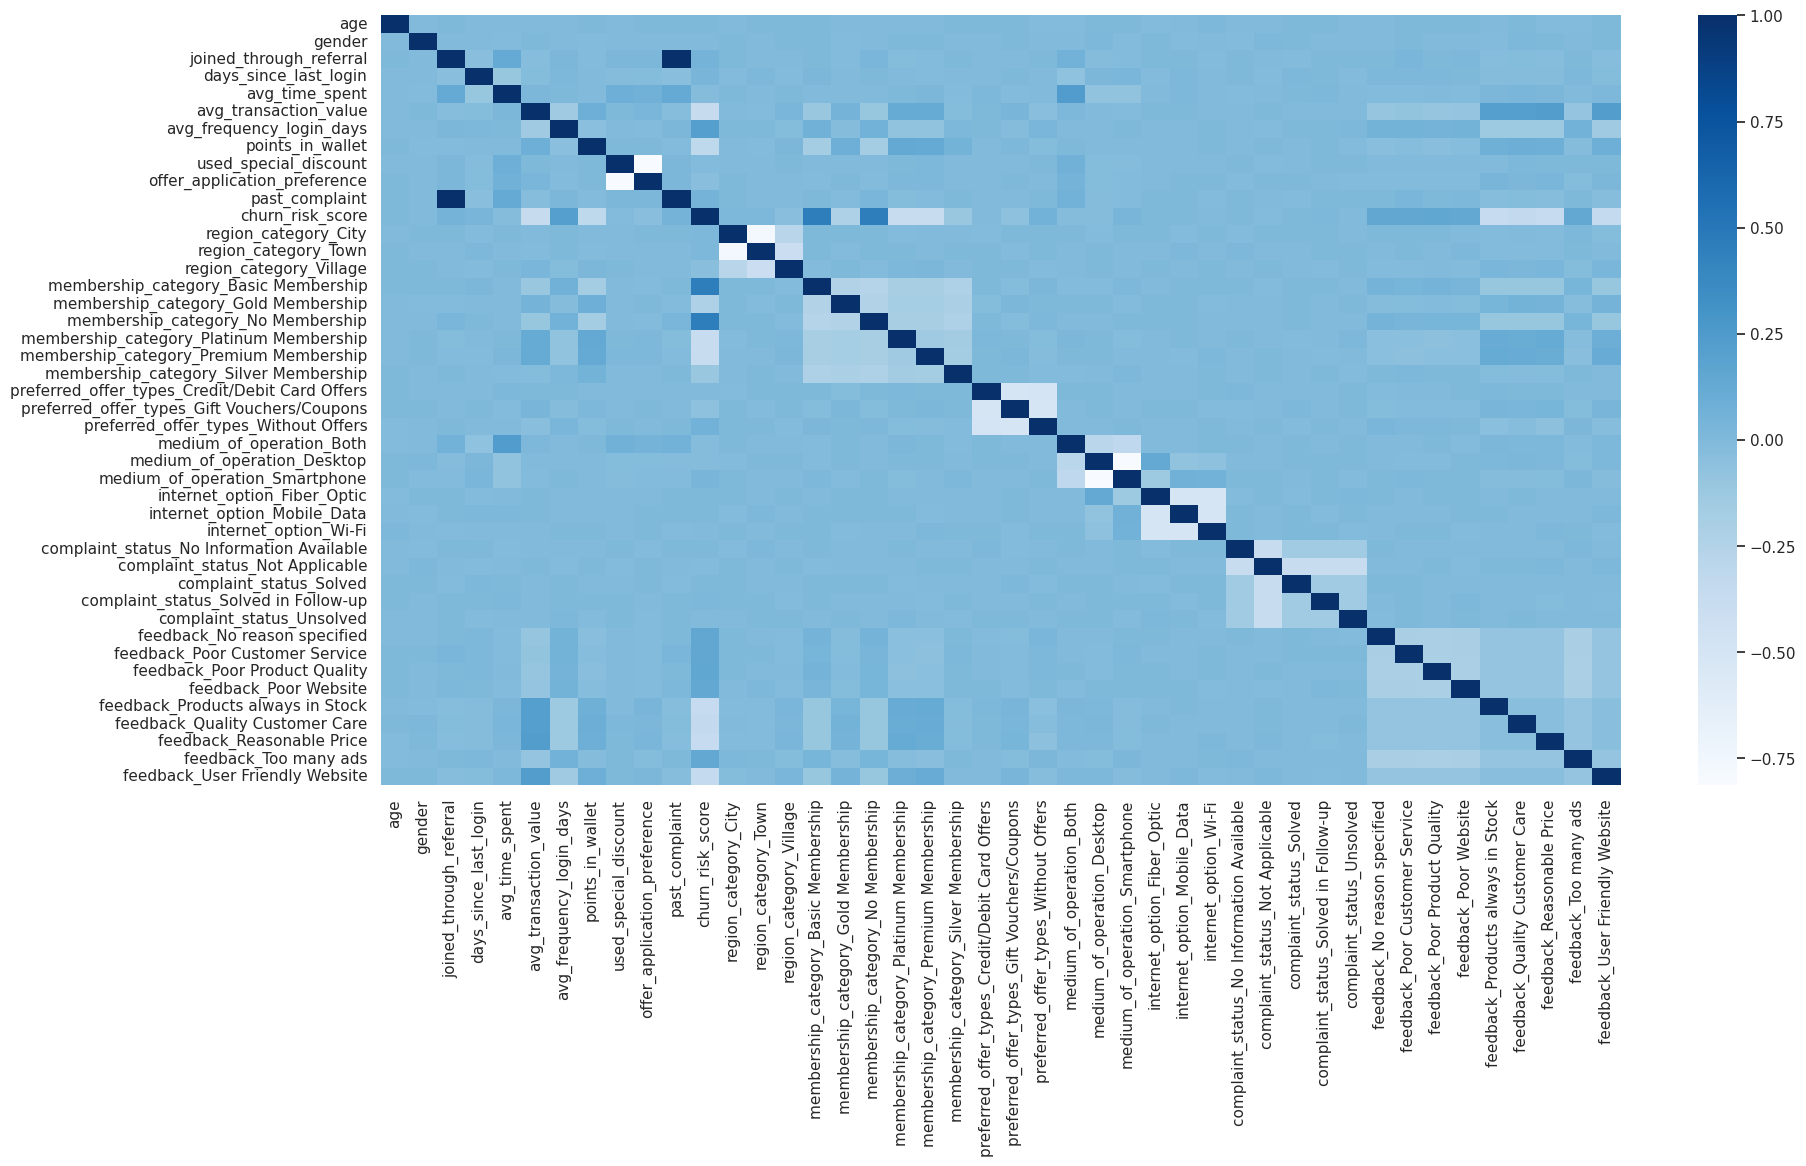

In [ ]:
sns.set(rc = {'figure.figsize':(20, 10)});
sns.heatmap(df.corr(), cmap = "Blues");

In [ ]:
def prepare_X_y(df):
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")
    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y

In [ ]:
X, y = prepare_X_y(df)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Use SelectFromModel for feature selection
selector = SelectFromModel(estimator=classifier, threshold= 0.01)
X_selected = selector.fit_transform(X, y)

# Get the support mask indicating selected features
feature_mask = selector.get_support()

# Extract the selected features from the original feature matrix
X_selected_original = X[:, feature_mask]
X_selected_original.shape

(35829, 16)

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.8

trainX, testX, trainY, testY = train_test_split(X_selected_original, y, train_size = TRAIN_SIZE, random_state = RANDOM_STATE, stratify = y )

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

sm = SMOTE(random_state = RANDOM_STATE)
trainX, trainY = sm.fit_resample(trainX,trainY)

under = RandomUnderSampler()
trainX, trainY = under.fit_resample(trainX,trainY)

## Build Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_model(X, y):
    class_weights = dict()
    for label in set(y):
      class_weights[label] = len(y) / (len(set(y)) * list(y).count(label))
    pipe = Pipeline(steps = [("scaler", RobustScaler(quantile_range = (25.0, 75.0))), ("svc", SVC(class_weight = class_weights))])
    # param_grid = {
    #     "scaler__quantile_range": [(25.0, 75.0), (5.0, 95.0), (10.0, 90.0), (1.0, 99.0)],
    #     'svc__kernel': ('sigmoid', 'rbf', 'poly') ,
    #     'svc__C':[0.1, 1, 10, 100]
    #     # 'svc__gamma': [1, 0.1, 0.01, 0.001]
    #     # 'svc__degree' : [1, 2, 3, 4, 5, 6]
    # }
    # model = GridSearchCV(pipe, param_grid, n_jobs = 5)
    pipe.fit(X, y)
    return pipe

In [ ]:
model = build_model(trainX, trainY)

## Measure Performance

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def calculate_performance(y_true, y_pred):
    average_values = 'micro'
    print("Precision: ", precision_score(y_true, y_pred, average = average_values))
    main_score = recall_score(y_true, y_pred, average = average_values)
    print("Recall: ", main_score)
    print("F1: ", f1_score(y_true , y_pred, average = average_values))
    print("-" * 100)
    print("Classification report: \n", classification_report(y_true , y_pred))

    label = [1, 2, 3, 4, 5]
    sns.set(rc = {'figure.figsize':(8, 5)})
    sns.heatmap(confusion_matrix(y_true , y_pred), annot = True, cmap ='Blues', fmt = '.0f', xticklabels = label, yticklabels = label)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.title('Confusion Matrix')
    plt.show()
    return main_score

Precision:  0.7750089938841588
Recall:  0.7750089938841588
F1:  0.7750089938841588
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           1       0.75      0.85      0.80      8339
           2       0.83      0.72      0.77      8339
           3       0.91      0.90      0.90      8339
           4       0.80      0.41      0.54      8339
           5       0.67      1.00      0.80      8339

    accuracy                           0.78     41695
   macro avg       0.79      0.78      0.76     41695
weighted avg       0.79      0.78      0.76     41695



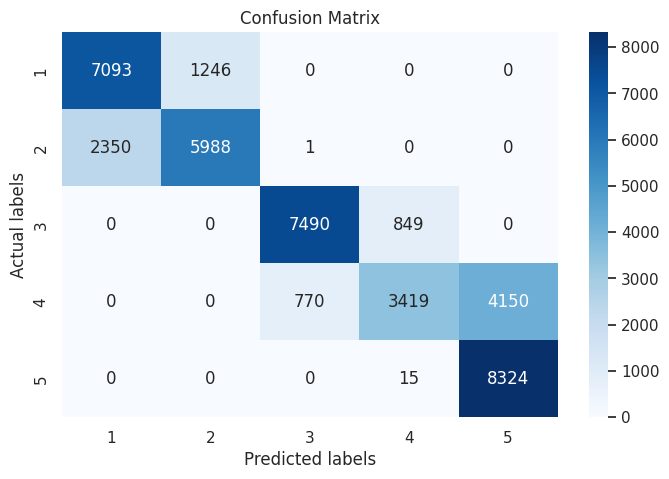

Recall of Train:  0.7750089938841588


In [ ]:
pred = model.predict(trainX)
print("Recall of Train: ", calculate_performance(trainY, pred))

Precision:  0.7564889757186715
Recall:  0.7564889757186715
F1:  0.7564889757186714
----------------------------------------------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           1       0.67      0.75      0.71       530
           2       0.73      0.64      0.68       548
           3       0.90      0.90      0.90      2085
           4       0.80      0.41      0.54      2037
           5       0.66      1.00      0.79      1966

    accuracy                           0.76      7166
   macro avg       0.75      0.74      0.73      7166
weighted avg       0.78      0.76      0.74      7166



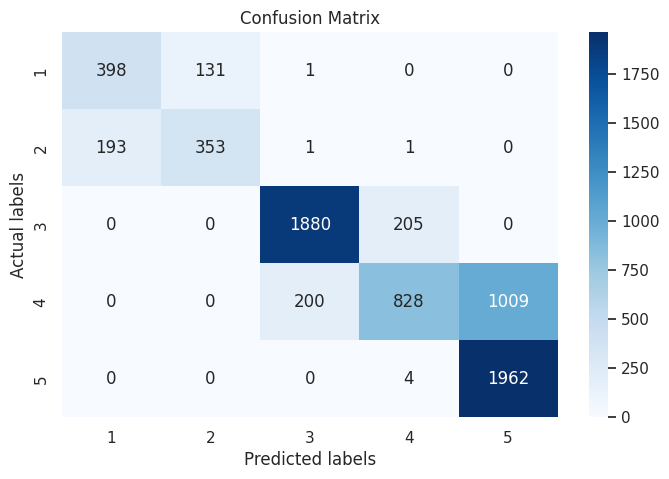

Recall of Test:  0.7564889757186715


In [ ]:
pred = model.predict(testX)
print("Recall of Test: ",calculate_performance(testY, pred))

# Conclusion

- Trong bài toán dự đoán tỉ lệ khách hàng từ bỏ sử dụng dịch vụ (Churn rate prediction) sử dụng thuật toán support vector machine (SVM) thì để đánh giá mô hình chúng ta sẽ quan tâm chủ yểu về điểm recall. Bởi vì nó đo lường khả năng của mô hình trong việc xác định chính xác tất cả các trường hợp positive, tức là những khách hàng có khả năng từ bỏ dịch vụ.Việc quan tâm đến điểm recall đảm bảo rằng một tỷ lệ lớn hơn những người từ bỏ tiềm năng được xác định chính xác, cho phép công ty thực hiện các hành động thích hợp làm giảm sự tiêu hao của khách hàng.

- Trong bối cảnh bài toán churn rate prediction thì ta biết rằng việc xác định chính xác lượng người từ bỏ sử dụng dịch vụ quan trọng hơn việc xác định sai những người dùng sẽ tiếp tục sử dụng và đồng nghĩa với việc hậu quả của việc xác định sai những người không từ bỏ ít ảnh hưởng hơn so với việc bỏ sót những người có tiềm năng  sẽ từ bỏ.Điều đó có thể chỉ ra rằng điểm recall phù hợp hơn điểm precision trong bài toán trên.

- Với mô hình SVM cũng với những siêu tham số như __(quantile_range = (25.0, 75.0), C = 1, class_weight = class_weights)__, ta thu được kết quả khoảng __75.6%__, đây là một kết quả khá tốt và điều này sẽ xác định chính xác một lượng đáng kế các khách hàng có tiềm năng từ bỏ dịch vụ. Tuy nhiên, mô hình của ta dữ đoán sai một lượng đáng kể những khách hàng đang có điểm từ bỏ (churn score) là 4 sang 5, nguyên nhân của việc này có thể là do dữ liệu có sự quá giống nhau tại từng features của những mẫu dữ liệu có label là 4 và 5.

- Khi ta đo hiệu suất của mô hình trên tập thử nghiệm (test) so với hiệu suất của nó trên tập huấn luyện (train), ta có thể thấy rằng mô hình không bị overfitting và khái quát hóa tốt với dữ liệu.

- Nhìn chung, mô hình thể hiện __accuracy, precision, recall và F1 score__ khá tốt, điều này chứng minh được tính hiệu quả của mô hình trong việc dự đoán.Ngoài ra, việc chọn những siêu tham số phù hợp để xây dụng mô hình cũng góp phần vào kết quả đạt được.